# Model Inspection Notebook

**Purpose:** Inspect the trained Random Forest model and associated files

**Files to inspect:**
- `backend/models/random_forest_model.pkl` - Trained Random Forest classifier
- `backend/models/scaler.pkl` - StandardScaler for feature normalization
- `backend/models/feature_columns.pkl` - List of 39 feature names

**Created:** October 26, 2024

---

## 1. Import Libraries

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Load All Pickle Files

In [2]:
# Define paths using Windows format
MODEL_PATH = r'backend\models\random_forest_model.pkl'
SCALER_PATH = r'backend\models\scaler.pkl'
FEATURES_PATH = r'backend\models\feature_columns.pkl'

# Load Random Forest model
print("Loading Random Forest model...")
with open(MODEL_PATH, 'rb') as f:
    rf_model = pickle.load(f)
print(f"✓ Loaded: {type(rf_model).__name__}")

# Load StandardScaler
print("\nLoading StandardScaler...")
with open(SCALER_PATH, 'rb') as f:
    scaler = pickle.load(f)
print(f"✓ Loaded: {type(scaler).__name__}")

# Load feature columns
print("\nLoading feature columns...")
with open(FEATURES_PATH, 'rb') as f:
    feature_columns = pickle.load(f)
print(f"✓ Loaded: {len(feature_columns)} features")

print("\n" + "="*70)
print("ALL FILES LOADED SUCCESSFULLY")
print("="*70)

Loading Random Forest model...
✓ Loaded: RandomForestClassifier

Loading StandardScaler...
✓ Loaded: StandardScaler

Loading feature columns...
✓ Loaded: 39 features

ALL FILES LOADED SUCCESSFULLY


## 3. View Feature List

In [3]:
print(f"Total Features: {len(feature_columns)}")
print("\n" + "="*70)
print("FEATURE NAMES:")
print("="*70)

# Display features in a formatted table
for i, feature in enumerate(feature_columns, 1):
    print(f"{i:2d}. {feature}")

# Categorize features
print("\n" + "="*70)
print("FEATURE CATEGORIES:")
print("="*70)

# True numeric features (these are the ones that get scaled)
numeric_features = [
    'engagement_score',
    'binome_score', 
    'average_grade_numeric',
    'field_similarity',
    'needs_count',
    'needs_pro',
    'needs_study',
    'needs_both',
    'high_engagement',
    'low_binome_score'
]

# Filter to only include features that exist in feature_columns
numeric_features = [f for f in numeric_features if f in feature_columns]

workfield_features = [f for f in feature_columns if f.startswith('workfield_')]
study_level_features = [f for f in feature_columns if f.startswith('study_level_')]
field_of_study_features = [f for f in feature_columns if f.startswith('field_of_study_')]
degree_features = [f for f in feature_columns if f.startswith('degree_')]
program_features = [f for f in feature_columns if f.startswith('program_')]
frequency_features = [f for f in feature_columns if f.startswith('desired_exchange_frequency_')]

print(f"\nNumeric Features (Scaled) ({len(numeric_features)}):")
for f in numeric_features:
    print(f"  - {f}")

print(f"\nWorkfield One-Hot Encoded ({len(workfield_features)}):")
for f in workfield_features:
    print(f"  - {f}")

print(f"\nField of Study One-Hot Encoded ({len(field_of_study_features)}):")
for f in field_of_study_features:
    print(f"  - {f}")

print(f"\nStudy Level One-Hot Encoded ({len(study_level_features)}):")
for f in study_level_features:
    print(f"  - {f}")

print(f"\nDegree One-Hot Encoded ({len(degree_features)}):")
for f in degree_features:
    print(f"  - {f}")

print(f"\nProgram One-Hot Encoded ({len(program_features)}):")
for f in program_features:
    print(f"  - {f}")

print(f"\nExchange Frequency One-Hot Encoded ({len(frequency_features)}):")
for f in frequency_features:
    print(f"  - {f}")

Total Features: 39

FEATURE NAMES:
 1. engagement_score
 2. binome_score
 3. average_grade_numeric
 4. field_similarity
 5. needs_count
 6. needs_pro
 7. needs_study
 8. needs_both
 9. high_engagement
10. low_binome_score
11. workfield_Banking-Finance
12. workfield_Computer science
13. workfield_Engineering
14. workfield_Healthcare
15. workfield_Human Resources
16. workfield_Law
17. workfield_Marketing
18. workfield_Other
19. workfield_Teaching
20. workfield_Unknown
21. field_of_study_Banking, Insurance and Finance
22. field_of_study_Commerce, Management, Economics, Management
23. field_of_study_Education, Teaching
24. field_of_study_Engineering
25. field_of_study_Healthcare, Medicine
26. field_of_study_IT, IS, Data, Web, Tech
27. field_of_study_Law, Legal Studies
28. field_of_study_Marketing, Communication
29. field_of_study_Other
30. study_level_Bac+2
31. study_level_Bac+3
32. study_level_Bac+4
33. study_level_Bac+5+
34. degree_BTS
35. degree_Licence
36. degree_Master
37. program_PP


## 4. Model Hyperparameters

In [4]:
print("="*70)
print("RANDOM FOREST HYPERPARAMETERS:")
print("="*70)

# Access hyperparameters directly to avoid version compatibility issues
print(f"{'n_estimators':25s}: {rf_model.n_estimators}")
print(f"{'max_depth':25s}: {rf_model.max_depth}")
print(f"{'min_samples_split':25s}: {rf_model.min_samples_split}")
print(f"{'min_samples_leaf':25s}: {rf_model.min_samples_leaf}")
print(f"{'max_features':25s}: {rf_model.max_features}")
print(f"{'class_weight':25s}: {rf_model.class_weight}")
print(f"{'bootstrap':25s}: {rf_model.bootstrap}")
print(f"{'random_state':25s}: {rf_model.random_state}")
print(f"{'n_jobs':25s}: {rf_model.n_jobs}")

print("\n" + "="*70)
print("MODEL INFORMATION:")
print("="*70)
print(f"Number of trees:          {rf_model.n_estimators}")
print(f"Number of features:       {rf_model.n_features_in_}")
print(f"Number of classes:        {len(rf_model.classes_)}")
print(f"Classes:                  {rf_model.classes_}")
print(f"Number of outputs:        {rf_model.n_outputs_}")

RANDOM FOREST HYPERPARAMETERS:
n_estimators             : 500
max_depth                : 7
min_samples_split        : 20
min_samples_leaf         : 10
max_features             : sqrt
class_weight             : balanced
bootstrap                : True
random_state             : 42
n_jobs                   : -1

MODEL INFORMATION:
Number of trees:          500
Number of features:       39
Number of classes:        2
Classes:                  [0 1]
Number of outputs:        1


## 5. Feature Importance Analysis

In [5]:
# Get feature importances
importances = rf_model.feature_importances_

# Create DataFrame for easy sorting
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Display top 20 features
print("="*70)
print("TOP 20 MOST IMPORTANT FEATURES:")
print("="*70)
print(feature_importance_df.head(20).to_string(index=False))

# Summary statistics
print("\n" + "="*70)
print("IMPORTANCE STATISTICS:")
print("="*70)
print(f"Mean importance:    {importances.mean():.6f}")
print(f"Median importance:  {np.median(importances):.6f}")
print(f"Max importance:     {importances.max():.6f}")
print(f"Min importance:     {importances.min():.6f}")
print(f"Std dev:            {importances.std():.6f}")

TOP 20 MOST IMPORTANT FEATURES:
                                                       Feature  Importance
                                              engagement_score    0.418381
                                               high_engagement    0.276559
                                                  binome_score    0.169726
                                              low_binome_score    0.091344
                                                   needs_count    0.004337
                                                    needs_both    0.003926
                                    workfield_Computer science    0.003663
                                                   needs_study    0.003071
                                         average_grade_numeric    0.002437
desired_exchange_frequency_Once every two weeks (or Bi-weekly)    0.001396
                                                degree_Licence    0.001383
                                            study_level_Bac+5+    0.

## 6. Feature Importance Visualization - Top 20

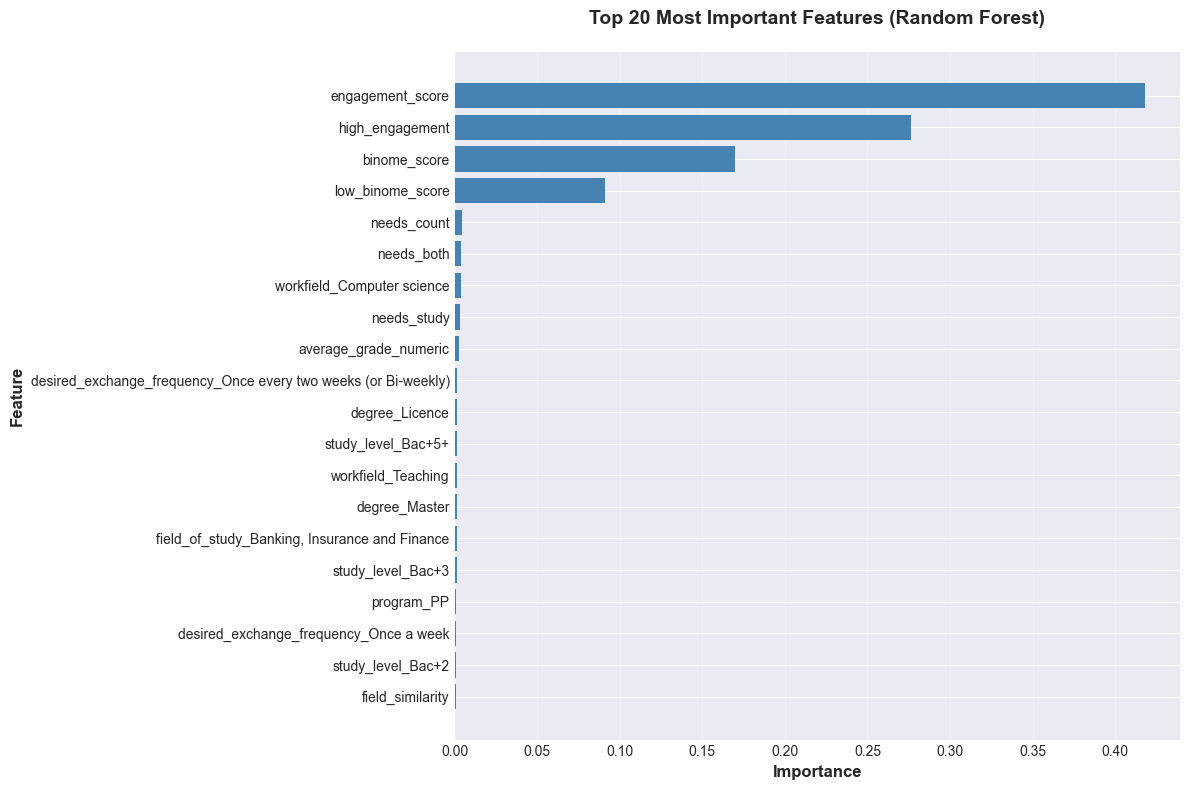


✓ Top feature: engagement_score (0.4184)


In [6]:
# Plot top 20 features
plt.figure(figsize=(12, 8))
top_20 = feature_importance_df.head(20)

plt.barh(range(len(top_20)), top_20['Importance'], color='steelblue')
plt.yticks(range(len(top_20)), top_20['Feature'])
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Top 20 Most Important Features (Random Forest)', 
          fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n✓ Top feature: {top_20.iloc[0]['Feature']} ({top_20.iloc[0]['Importance']:.4f})")

## 7. Feature Importance by Category

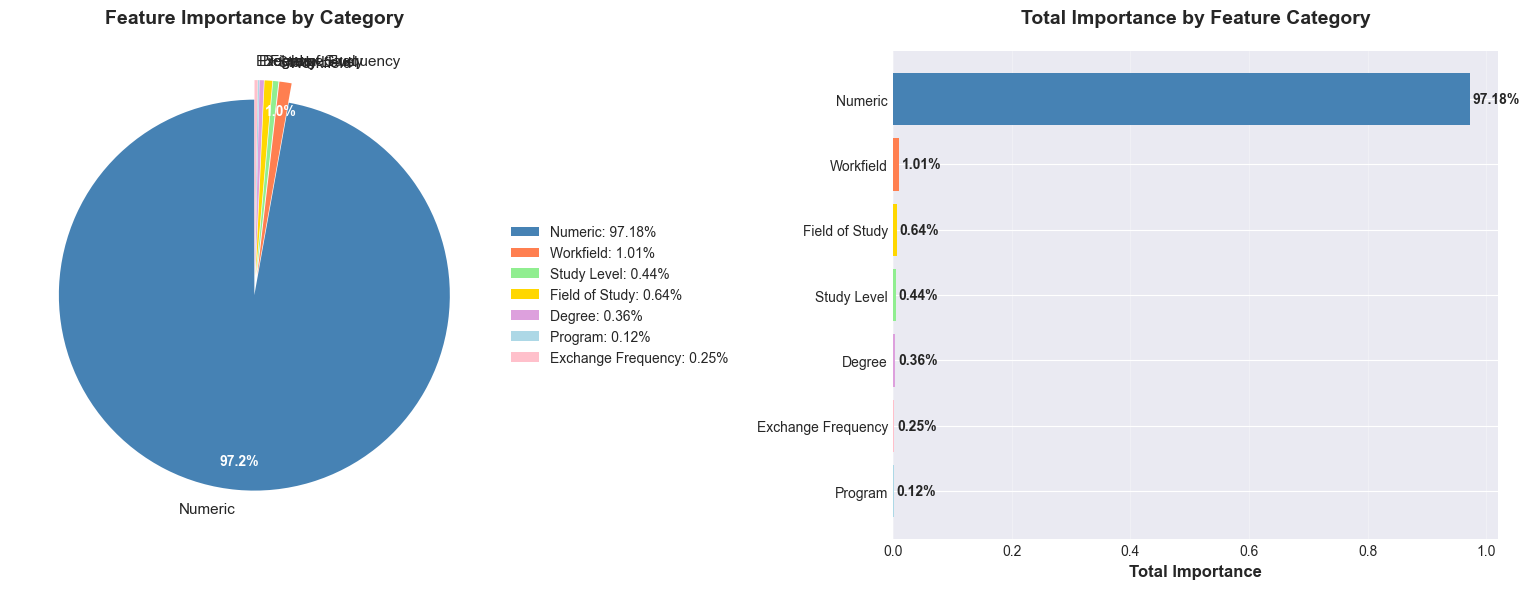


IMPORTANCE BY CATEGORY:
Numeric             : 0.9718 (97.18%)
Workfield           : 0.0101 (1.01%)
Field of Study      : 0.0064 (0.64%)
Study Level         : 0.0044 (0.44%)
Degree              : 0.0036 (0.36%)
Exchange Frequency  : 0.0025 (0.25%)
Program             : 0.0012 (0.12%)


In [7]:
# Calculate importance by category
category_importance = {
    'Numeric': sum(importances[i] for i, f in enumerate(feature_columns) if f in numeric_features),
    'Workfield': sum(importances[i] for i, f in enumerate(feature_columns) if f in workfield_features),
    'Study Level': sum(importances[i] for i, f in enumerate(feature_columns) if f in study_level_features),
    'Field of Study': sum(importances[i] for i, f in enumerate(feature_columns) if f in field_of_study_features),
    'Degree': sum(importances[i] for i, f in enumerate(feature_columns) if f in degree_features),
    'Program': sum(importances[i] for i, f in enumerate(feature_columns) if f in program_features),
    'Exchange Frequency': sum(importances[i] for i, f in enumerate(feature_columns) if f in frequency_features)
}

# Remove categories with zero importance
category_importance = {k: v for k, v in category_importance.items() if v > 0}

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart with better label positioning
colors = ['steelblue', 'coral', 'lightgreen', 'gold', 'plum', 'lightblue', 'pink']
labels = list(category_importance.keys())
values = list(category_importance.values())

# Explode small slices (< 5%) to make them more visible
explode = [0.1 if v < 0.05 else 0 for v in values]

# Custom autopct function to show percentage only if > 1%
def autopct_format(pct):
    return f'{pct:.1f}%' if pct > 1 else ''

wedges, texts, autotexts = ax1.pie(
    values, 
    labels=labels,
    autopct=autopct_format,
    startangle=90,
    colors=colors[:len(values)],
    explode=explode,
    pctdistance=0.85,  # Move percentage labels closer to edge
    textprops={'fontsize': 11}
)

# Make percentage text bold and white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

# Add legend with percentages for small slices
legend_labels = [f'{label}: {value*100:.2f}%' for label, value in category_importance.items()]
ax1.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)

ax1.set_title('Feature Importance by Category', fontsize=14, fontweight='bold', pad=20)

# Bar chart (horizontal for better readability)
categories = list(category_importance.keys())
values_list = list(category_importance.values())

# Sort by importance (descending)
sorted_data = sorted(zip(categories, values_list, colors[:len(categories)]), 
                     key=lambda x: x[1], reverse=True)
categories_sorted, values_sorted, colors_sorted = zip(*sorted_data)

bars = ax2.barh(range(len(categories_sorted)), values_sorted, color=colors_sorted)
ax2.set_yticks(range(len(categories_sorted)))
ax2.set_yticklabels(categories_sorted)
ax2.set_xlabel('Total Importance', fontsize=12, fontweight='bold')
ax2.set_title('Total Importance by Feature Category', fontsize=14, fontweight='bold', pad=20)
ax2.grid(axis='x', alpha=0.3)
ax2.invert_yaxis()  # Highest at top

# Add percentage labels on bars
for i, (bar, val) in enumerate(zip(bars, values_sorted)):
    ax2.text(val + 0.005, i, f'{val*100:.2f}%', 
             va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*70)
print("IMPORTANCE BY CATEGORY:")
print("="*70)
for category, importance in sorted(category_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{category:20s}: {importance:.4f} ({importance*100:.2f}%)")

## 8. StandardScaler Statistics

STANDARD SCALER STATISTICS:

Scaler has been fitted on 10 features
Number of samples seen: 10810

Scaled features: 10

              Feature     Mean  Std Dev  Variance
     engagement_score 1.549841 1.038862  1.079234
         binome_score 3.712558 2.536386  6.433253
average_grade_numeric 2.850463 0.826091  0.682426
     field_similarity 0.142183 0.404926  0.163965
          needs_count 1.240333 0.427286  0.182573
            needs_pro 0.849399 0.357660  0.127921
          needs_study 0.390934 0.487960  0.238105
           needs_both 0.240333 0.427286  0.182573
      high_engagement 0.324237 0.468089  0.219107
     low_binome_score 0.422849 0.494012  0.244048


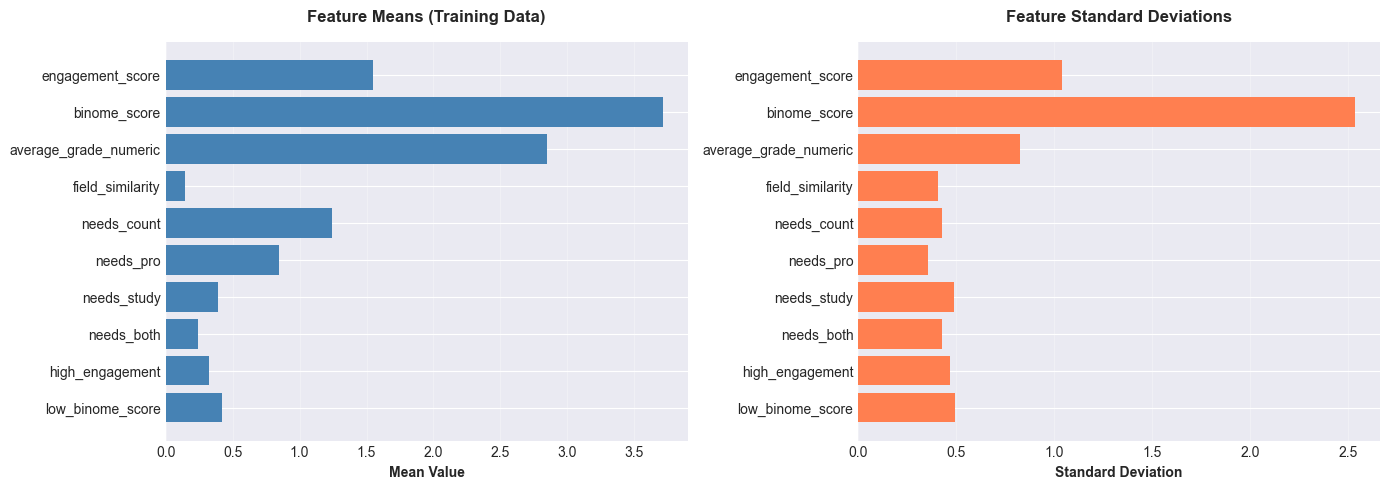

In [8]:
print("="*70)
print("STANDARD SCALER STATISTICS:")
print("="*70)

# Check if scaler has been fitted
if hasattr(scaler, 'mean_'):
    print(f"\nScaler has been fitted on {scaler.n_features_in_} features")
    print(f"Number of samples seen: {scaler.n_samples_seen_}")
    
    # Get the actual scaled numeric features
    scaled_feature_count = scaler.n_features_in_
    print(f"\nScaled features: {scaled_feature_count}")
    
    # Only use the first N numeric features that match the scaler
    scaled_features = numeric_features[:scaled_feature_count]
    
    # Create DataFrame with scaler statistics
    scaler_df = pd.DataFrame({
        'Feature': scaled_features,
        'Mean': scaler.mean_,
        'Std Dev': scaler.scale_,
        'Variance': scaler.var_
    })
    
    print("\n" + scaler_df.to_string(index=False))
    
    # Visualize scaler statistics
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Mean values
    ax1.barh(range(len(scaler_df)), scaler_df['Mean'], color='steelblue')
    ax1.set_yticks(range(len(scaler_df)))
    ax1.set_yticklabels(scaler_df['Feature'])
    ax1.set_xlabel('Mean Value', fontweight='bold')
    ax1.set_title('Feature Means (Training Data)', fontweight='bold', pad=15)
    ax1.grid(axis='x', alpha=0.3)
    ax1.invert_yaxis()
    
    # Standard deviation
    ax2.barh(range(len(scaler_df)), scaler_df['Std Dev'], color='coral')
    ax2.set_yticks(range(len(scaler_df)))
    ax2.set_yticklabels(scaler_df['Feature'])
    ax2.set_xlabel('Standard Deviation', fontweight='bold')
    ax2.set_title('Feature Standard Deviations', fontweight='bold', pad=15)
    ax2.grid(axis='x', alpha=0.3)
    ax2.invert_yaxis()
    
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠ Scaler has not been fitted yet")

## 9. Test Prediction - High Risk Case

TEST PREDICTION - HIGH RISK CASE

Test Case:
  Workfield: Computer Science
  Study Level: Bac+2
  Engagement Score: 0.5 (Low)
  Binome Score: 2 (Low)
  Average Grade: 1 (Low)
  Field Similarity: 0 (No match)
  Needs: Professional only

PREDICTION RESULTS:
Prediction:               0 (Failure)
Probability of Success:   8.15%
Probability of Failure:   91.85%

Risk Level:               🔴 HIGH RISK


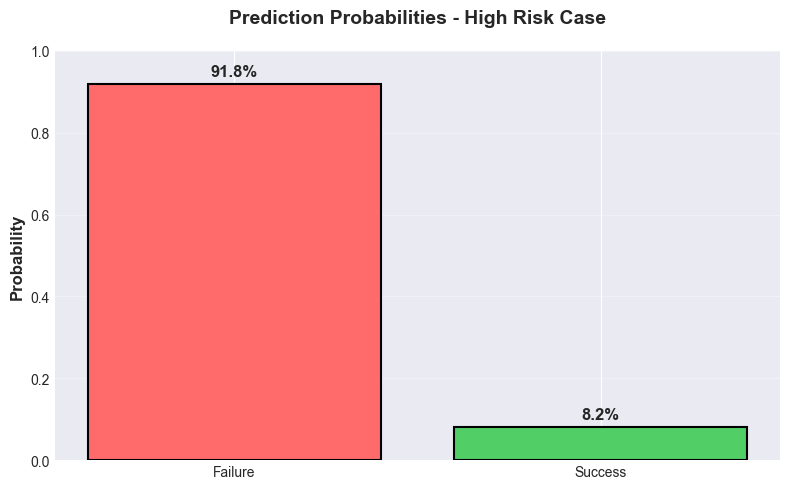

In [9]:
print("="*70)
print("TEST PREDICTION - HIGH RISK CASE")
print("="*70)

# Create a high-risk test case using actual features
test_case = {
    'engagement_score': 0.5,  # Low engagement
    'binome_score': 2,  # Low score
    'average_grade_numeric': 1,  # Low grades
    'field_similarity': 0,  # No match
    'needs_count': 1,  # Only one need
    'needs_pro': 1,  # Professional need
    'needs_study': 0,
    'needs_both': 0,
    'high_engagement': 0,  # Not high engagement
    'low_binome_score': 1  # Low binome score flag
}

# Add one-hot encoded features (all zeros except Computer Science and Bac+2)
for col in feature_columns:
    if col not in test_case:
        if col == 'workfield_Computer science':
            test_case[col] = 1
        elif col == 'study_level_Bac+2':
            test_case[col] = 1
        else:
            test_case[col] = 0

# Convert to DataFrame with correct feature order
test_df = pd.DataFrame([test_case])[feature_columns]

print("\nTest Case:")
print("  Workfield: Computer Science")
print("  Study Level: Bac+2")
print("  Engagement Score: 0.5 (Low)")
print("  Binome Score: 2 (Low)")
print("  Average Grade: 1 (Low)")
print("  Field Similarity: 0 (No match)")
print("  Needs: Professional only")

# Scale numeric features - keep as DataFrame to avoid warnings
numeric_cols = [f for f in feature_columns if f in numeric_features]
test_df_scaled = test_df.copy()
test_df_scaled[numeric_cols] = scaler.transform(test_df[numeric_cols])

# Make prediction (use DataFrame directly to preserve feature names)
prediction = rf_model.predict(test_df_scaled)
probability = rf_model.predict_proba(test_df_scaled)[0]

print("\n" + "="*70)
print("PREDICTION RESULTS:")
print("="*70)
print(f"Prediction:               {prediction[0]} ({'Success' if prediction[0] == 1 else 'Failure'})")
print(f"Probability of Success:   {probability[1]:.2%}")
print(f"Probability of Failure:   {probability[0]:.2%}")
print(f"\nRisk Level:               {'🔴 HIGH RISK' if probability[0] > 0.6 else '🟡 MEDIUM RISK' if probability[0] > 0.4 else '🟢 LOW RISK'}")

# Visualize prediction
fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#ff6b6b', '#51cf66']
ax.bar(['Failure', 'Success'], probability, color=colors, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Probability', fontsize=12, fontweight='bold')
ax.set_title('Prediction Probabilities - High Risk Case', fontsize=14, fontweight='bold', pad=20)
ax.set_ylim(0, 1)
ax.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for i, prob in enumerate(probability):
    ax.text(i, prob + 0.02, f'{prob:.1%}', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 10. Test Prediction - Low Risk Case

TEST PREDICTION - LOW RISK CASE

Test Case:
  Workfield: Teaching
  Study Level: Bac+5+
  Engagement Score: 2.8 (High)
  Binome Score: 10 (High)
  Average Grade: 4 (High)
  Field Similarity: 2 (Perfect match)
  Needs: Both Professional and Academic

PREDICTION RESULTS:
Prediction:               1 (Success)
Probability of Success:   92.01%
Probability of Failure:   7.99%

Risk Level:               🟢 LOW RISK


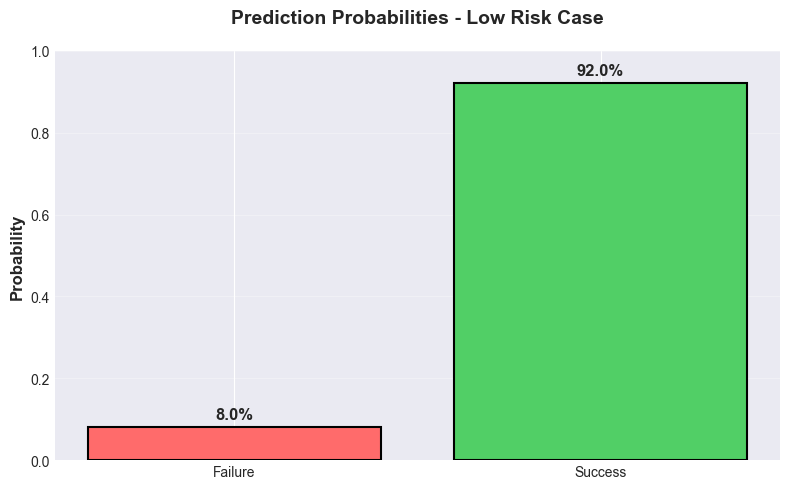

In [10]:
print("="*70)
print("TEST PREDICTION - LOW RISK CASE")
print("="*70)

# Create a low-risk test case using actual features
test_case_low = {
    'engagement_score': 2.8,  # High engagement
    'binome_score': 10,  # High score
    'average_grade_numeric': 4,  # High grades
    'field_similarity': 2,  # Perfect match
    'needs_count': 2,  # Both needs
    'needs_pro': 1,  # Professional need
    'needs_study': 1,  # Study need
    'needs_both': 1,  # Both flag
    'high_engagement': 1,  # High engagement flag
    'low_binome_score': 0  # Not low binome score
}

# Add one-hot encoded features (Teaching and Bac+5+)
for col in feature_columns:
    if col not in test_case_low:
        if col == 'workfield_Teaching':
            test_case_low[col] = 1
        elif col == 'study_level_Bac+5+':
            test_case_low[col] = 1
        else:
            test_case_low[col] = 0

# Convert to DataFrame with correct feature order
test_df_low = pd.DataFrame([test_case_low])[feature_columns]

print("\nTest Case:")
print("  Workfield: Teaching")
print("  Study Level: Bac+5+")
print("  Engagement Score: 2.8 (High)")
print("  Binome Score: 10 (High)")
print("  Average Grade: 4 (High)")
print("  Field Similarity: 2 (Perfect match)")
print("  Needs: Both Professional and Academic")

# Scale numeric features - keep as DataFrame to avoid warnings
numeric_cols = [f for f in feature_columns if f in numeric_features]
test_df_low_scaled = test_df_low.copy()
test_df_low_scaled[numeric_cols] = scaler.transform(test_df_low[numeric_cols])

# Make prediction (use DataFrame directly to preserve feature names)
prediction_low = rf_model.predict(test_df_low_scaled)
probability_low = rf_model.predict_proba(test_df_low_scaled)[0]

print("\n" + "="*70)
print("PREDICTION RESULTS:")
print("="*70)
print(f"Prediction:               {prediction_low[0]} ({'Success' if prediction_low[0] == 1 else 'Failure'})")
print(f"Probability of Success:   {probability_low[1]:.2%}")
print(f"Probability of Failure:   {probability_low[0]:.2%}")
print(f"\nRisk Level:               {'🔴 HIGH RISK' if probability_low[0] > 0.6 else '🟡 MEDIUM RISK' if probability_low[0] > 0.4 else '🟢 LOW RISK'}")

# Visualize prediction
fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#ff6b6b', '#51cf66']
ax.bar(['Failure', 'Success'], probability_low, color=colors, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Probability', fontsize=12, fontweight='bold')
ax.set_title('Prediction Probabilities - Low Risk Case', fontsize=14, fontweight='bold', pad=20)
ax.set_ylim(0, 1)
ax.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for i, prob in enumerate(probability_low):
    ax.text(i, prob + 0.02, f'{prob:.1%}', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 11. Compare High vs Low Risk Predictions

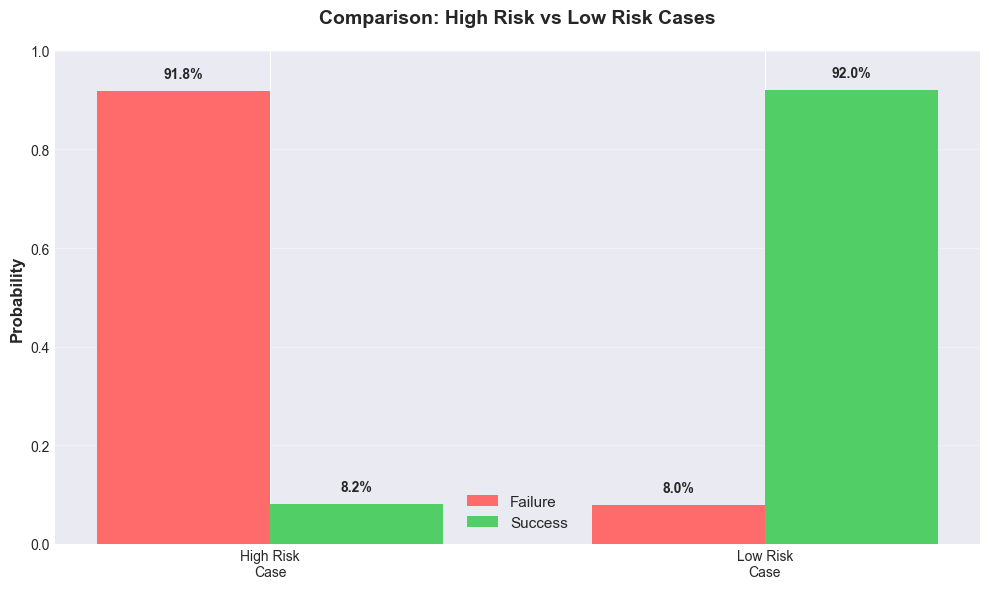


SUMMARY:
High Risk Case - Failure Risk: 91.8%
Low Risk Case - Failure Risk:  8.0%

Difference: 83.9% lower risk for optimal case


In [11]:
# Create comparison visualization
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(2)
width = 0.35

# Plot failure probabilities
failure_probs = [probability[0], probability_low[0]]
success_probs = [probability[1], probability_low[1]]

rects1 = ax.bar(x - width/2, failure_probs, width, label='Failure', color='#ff6b6b')
rects2 = ax.bar(x + width/2, success_probs, width, label='Success', color='#51cf66')

ax.set_ylabel('Probability', fontsize=12, fontweight='bold')
ax.set_title('Comparison: High Risk vs Low Risk Cases', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(['High Risk\nCase', 'Low Risk\nCase'])
ax.legend(fontsize=11)
ax.set_ylim(0, 1)
ax.grid(axis='y', alpha=0.3)

# Add percentage labels
for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height + 0.02,
            f'{height:.1%}', ha='center', va='bottom', fontsize=10, fontweight='bold')

for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height + 0.02,
            f'{height:.1%}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("SUMMARY:")
print("="*70)
print(f"High Risk Case - Failure Risk: {probability[0]:.1%}")
print(f"Low Risk Case - Failure Risk:  {probability_low[0]:.1%}")
print(f"\nDifference: {abs(probability[0] - probability_low[0]):.1%} lower risk for optimal case")

## 12. Model Summary

In [12]:
print("="*70)
print("MODEL INSPECTION SUMMARY")
print("="*70)

print("\n📊 MODEL CONFIGURATION:")
print(f"  Algorithm:             Random Forest Classifier")
print(f"  Number of Trees:       {rf_model.n_estimators}")
print(f"  Max Depth:             {rf_model.max_depth}")
print(f"  Total Features:        {len(feature_columns)}")
print(f"  Numeric Features:      {len(numeric_features)}")
print(f"  Categorical Features:  {len(feature_columns) - len(numeric_features)}")

print("\n🎯 TOP 5 MOST IMPORTANT FEATURES:")
for i, row in feature_importance_df.head(5).iterrows():
    print(f"  {row['Feature']:35s}: {row['Importance']:.4f}")

print("\n📈 FEATURE CATEGORY IMPORTANCE:")
for category, importance in sorted(category_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"  {category:15s}: {importance*100:5.2f}%")

print("\n🔧 SCALER INFORMATION:")
print(f"  Type:                  StandardScaler")
print(f"  Scaled Features:       {len(numeric_features)}")
print(f"  Samples Seen:          {scaler.n_samples_seen_:,}")

print("\n✅ INSPECTION COMPLETE!")
print("="*70)

MODEL INSPECTION SUMMARY

📊 MODEL CONFIGURATION:
  Algorithm:             Random Forest Classifier
  Number of Trees:       500
  Max Depth:             7
  Total Features:        39
  Numeric Features:      10
  Categorical Features:  29

🎯 TOP 5 MOST IMPORTANT FEATURES:
  engagement_score                   : 0.4184
  high_engagement                    : 0.2766
  binome_score                       : 0.1697
  low_binome_score                   : 0.0913
  needs_count                        : 0.0043

📈 FEATURE CATEGORY IMPORTANCE:
  Numeric        : 97.18%
  Workfield      :  1.01%
  Field of Study :  0.64%
  Study Level    :  0.44%
  Degree         :  0.36%
  Exchange Frequency:  0.25%
  Program        :  0.12%

🔧 SCALER INFORMATION:
  Type:                  StandardScaler
  Scaled Features:       10
  Samples Seen:          10,810

✅ INSPECTION COMPLETE!
